<a href="https://colab.research.google.com/github/adhalya/Analise_Campanha_Credito/blob/main/An%C3%A1lise_Campanha_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Dicionário



> Os dados contidos aqui são sintéticos, não refletem a realidade e foram utilizados apenas como demonstração de como foi desenvolvido um projeto real de tratamento e análise de dados. Qualquer dúvida, contacte-me através do linkedin.

---

*Perguntas Pessoais:*
- **S2A** - Como voce se identifica?

*Pergunta Sobre a Marca:*
- **BRAD31** - Quando você pensa em previdência privada qual é a primeira marca que vem a cabeça?

*Informações de Cadastro:*
- **user_email** - E-mail utilizado para preenchimento de formulário

*Dataframe sem ajuste (amostra):*
- **df1_inicio** - Dataframe antes da campanha
- **df2_inicio** - Dataframe depois da campanha
- **df_inicio** - Dataframe com antes e depois junto


Dataframe com ajuste (amostra):
- **df1_final** - Dataframe antes da campanha
- **df2_final** - Dataframe depois da campanha
- **df_final** - Dataframe com antes e depois junto

## Bibliotecas / Importação de arquivo

In [8]:
# Bibliotecas de manipulação e tratamento de dados
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.contingency_tables import mcnemar
from collections import Counter


In [9]:
df1 = pd.read_csv("https://raw.githubusercontent.com/adhalya/Analise_Campanha_Credito/refs/heads/main/Base%20de%20Dados/BRASILPREV_ANTES.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/adhalya/Analise_Campanha_Credito/refs/heads/main/Base%20de%20Dados/BRASILPREV_AP%C3%93S.csv")

In [10]:
df1.head()

,user_email,BRAD37,BRAD43,BRAD35,BRAD45,S5A,BRAD39,BRAD36,S2A,BRAD38,...,BRAD40,S6A,BRAD34,BRAD31,BRAD32,S4A,BRAD41,S3A,BRAD33,BRAD42
0,01@gmail.com,NaN,NaN,NaN,NaN,Desempregado,NaN,NaN,Feminino,"Nenhum conhecimento, nunca ouvi falar sobre pr...",...,NaN,NaN,NaN,Inss,NaN,Minas Gerais,NaN,Entre 18 e 27 anos,NaN,NaN
1,02@hotmail.com,NaN,NaN,NaN,NaN,Autônomo,NaN,NaN,Masculino,"Nenhum conhecimento, nunca ouvi falar sobre pr...",...,NaN,De R$ 1.000 a R$ 3.000,NaN,não sei,NaN,São Paulo,NaN,Entre 45 e 60 anos,NaN,NaN
2,03@gmail.com,NaN,"Alta preocupação , tenho medo e isso influenci...",NaN,Não,Estudante,NaN,NaN,Masculino,"Nenhum conhecimento, nunca ouvi falar sobre pr...",...,NaN,NaN,NaN,sony,NaN,Espírito Santo,NaN,Entre 18 e 27 anos,NaN,NaN
3,04@gmail.com,NaN,"Alta preocupação , tenho medo e isso influenci...",NaN,Não,Autônomo,NaN,NaN,Prefiro não informar,"Nenhum conhecimento, nunca ouvi falar sobre pr...",...,NaN,Acima de R$ 8.000,NaN,Prisão domiciliar,NaN,Espírito Santo,NaN,Entre 45 e 60 anos,NaN,NaN
4,05@gmail.com,NaN,"Nenhuma preocupação, confio completamente nas ...",NaN,Não,Estudante,NaN,NaN,Masculino,"Nenhum conhecimento, nunca ouvi falar sobre pr...",...,NaN,NaN,NaN,Privacidade,NaN,São Paulo,NaN,Menos de 18 anos,NaN,NaN


In [11]:
df2.head()

,user_email,BRAD41,BRAD38,BRAD31,BRAD46,BRAD32,BRAD33,S6A,BRAD39,BRAD44,...,BRAD37,BRAD36,BRAD35,BRAD42,BRAD43,S4A,S3A,BRAD34,S2A,BRAD45
0,01@gmail.com,NaN,NaN,NaN,Itaú Previdência|Nenhuma das anteriores,NaN,NaN,NaN,NaN,Confiança moderada,...,NaN,NaN,NaN,NaN,"Preocupação moderada, estou atento, mas ainda ...",NaN,NaN,NaN,NaN,Não
1,02@gmail.com,NaN,NaN,NaN,Caixa Previdência|Bradesco Previdência |XP Pre...,NaN,NaN,NaN,NaN,Confiança alta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Feminino,Não
2,03@gmail.com,NaN,NaN,Privada,Nenhuma das anteriores,NaN,NaN,NaN,NaN,Confiança muito baixa,...,NaN,NaN,NaN,NaN,"Nenhuma preocupação, confio completamente nas ...",NaN,Entre 28 e 45 anos,NaN,NaN,Não
3,04@uol.com.br,WhatsApp via ChatBot,"Conhecimento muito baixo, já ouvi falar, mas n...",Bb,NaN,Não tenho,NaN,NaN,Boleto,Confiança moderada,...,"Todo mês, como parte do meu orçamento",Até 5%,NaN,Ajudar quem eu amo,"Preocupação moderada, estou atento, mas ainda ...",NaN,NaN,NaN,NaN,Não
4,05@bol.com.br,NaN,"Nenhum conhecimento, nunca ouvi falar sobre pr...","Pode ser uma grande ajuda,para pessoas daninha...",NaN,NaN,NaN,De R$ 1.000 a R$ 3.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,São Paulo,Acima de 60 anos,NaN,Masculino,NaN


## Fase 1: Planejamento

**Revisão dos dados coletados nas duas rodadas de pesquisa, definição das métricas de análise e testes estatísticos apropriados.**

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_email  1228 non-null   object
 1   BRAD37      790 non-null    object
 2   BRAD43      1108 non-null   object
 3   BRAD35      266 non-null    object
 4   BRAD45      1097 non-null   object
 5   S5A         1223 non-null   object
 6   BRAD39      818 non-null    object
 7   BRAD36      791 non-null    object
 8   S2A         1221 non-null   object
 9   BRAD38      1224 non-null   object
 10  BRAD46      1104 non-null   object
 11  BRAD44      1104 non-null   object
 12  BRAD40      814 non-null    object
 13  S6A         817 non-null    object
 14  BRAD34      266 non-null    object
 15  BRAD31      1225 non-null   object
 16  BRAD32      1060 non-null   object
 17  S4A         1220 non-null   object
 18  BRAD41      810 non-null    object
 19  S3A         1221 non-null   object
 20  BRAD33  

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_email  2280 non-null   object
 1   BRAD41      1120 non-null   object
 2   BRAD38      2277 non-null   object
 3   BRAD31      2269 non-null   object
 4   BRAD46      1527 non-null   object
 5   BRAD32      1511 non-null   object
 6   BRAD33      467 non-null    object
 7   S6A         1199 non-null   object
 8   BRAD39      1143 non-null   object
 9   BRAD44      1539 non-null   object
 10  S5A         2276 non-null   object
 11  BRAD40      1131 non-null   object
 12  BRAD37      1028 non-null   object
 13  BRAD36      1032 non-null   object
 14  BRAD35      460 non-null    object
 15  BRAD42      1113 non-null   object
 16  BRAD43      1537 non-null   object
 17  S4A         2275 non-null   object
 18  S3A         2275 non-null   object
 19  BRAD34      463 non-null    object
 20  S2A     

**O objetivo desta análise é verificar se houve diferença significativa nas respostas sobre previdência privada antes e após a campanha. Para este estudo, serão utilizadas as variáveis BRAD31 e S2A, que servirão como variáveis-modelo, representando a forma como as análises reais foram desenvolvidas.**

#### Entendendo os dados da coluna BRAD31

*   BRAD31 - Quando você pensa em previdência privada qual é a primeira marca que vem a cabeça?

In [14]:
from IPython.display import display, HTML

BRAD31 = df1['BRAD31'].value_counts().sort_values(ascending=False).reset_index()
BRAD31.columns = ['Banco', 'Citações']

# Limitando a visualização da saída usando HTML com scroll
display(HTML(f"""
<div style="height:300px; overflow:auto; border:1px solid lightgray;">
    {BRAD31.to_html(index=False)}
</div>
"""))


Banco,Citações
Bradesco,85
Nenhuma,71
Não sei,58
Caixa,48
Nike,44
Itaú,39
Inss,31
Banco do Brasil,22
Itau,20
INSS,19


## Fase 2: Preparação dos dados

**Consolidação das informações, limpeza e tratamento dos dados extraídos dos arquivos CSV's.**

### Filtrando e declarado dataframes iniciais

In [15]:
# Utilizando os e-mails para comparar os dois dataframes
emails_em_comum = set(df1['user_email']) & set(df2['user_email'])

df1_filtrado = df1[df1['user_email'].isin(emails_em_comum)].copy()
df2_filtrado = df2[df2['user_email'].isin(emails_em_comum)].copy()


In [16]:
# Usando os e-mails em comum para unir as variáveis BRAD31 antes e após a campanha
df_inicio = pd.merge(
    df1_filtrado[['user_email', 'BRAD31']],
    df2_filtrado[['user_email', 'BRAD31']],
    on='user_email',
    suffixes=('_antes', '_depois')
)

In [17]:
# Identificando a mudança das respostas antes e após a campanha
df_inicio['mudou'] = df_inicio['BRAD31_antes'] != df_inicio['BRAD31_depois']
df_inicio['mudou'].value_counts()

,count
mudou,
True,861
False,14


Por se tratar de dados sensíveis, os e-mails foram renomeados para números antes do @. Os resultados obtidos nessa análise não condizem com os resultados do dataset original, este serve apenas como objeto de estudo.

In [18]:
df_mudancas = df_inicio[df_inicio['mudou']][['user_email', 'BRAD31_antes', 'BRAD31_depois']]

# Transformar em HTML com scroll
display(HTML(f"""
<div style="height:400px; overflow:auto; border:1px solid lightgray;">
    {df_mudancas.to_html(index=False)}
</div>
"""))


user_email,BRAD31_antes,BRAD31_depois
01@gmail.com,Inss,NaN
03@gmail.com,sony,Privada
06@gmail.com,Não me lembro,Não sei
07@gmail.com,Casa,Sla
08@gmail.com,NS,Nada
09@gmail.com,Nenhuma,Não sei
10@gmail.com,Privic,Nike
12@gmail.com,Nada,Não sei
13@gmail.com,adidas,Nike
14@gmail.com,Social,Jogos


In [19]:
# Criar DataFrames isolados para BRAD31_antes e BRAD31_depois
df1_inicio = df_inicio[['user_email', 'BRAD31_antes']].copy()
df2_inicio = df_inicio[['user_email', 'BRAD31_depois']].copy()

# Renomear as colunas para manter consistência
df1_inicio = df1_inicio.rename(columns={'BRAD31_antes': 'BRAD31'})
df2_inicio = df2_inicio.rename(columns={'BRAD31_depois': 'BRAD31'})

df1_inicio.tail()

,user_email,BRAD31
870,1221@gmail.com,Bradesco
871,1223@gmail.com,Jogo
872,1224@gmail.com,Nike
873,1227@gmail.com,Caixa
874,1228@gmail.com,Pulma


In [20]:
df2_inicio.tail()

,user_email,BRAD31
870,1221@gmail.com,Previdência social
871,1223@gmail.com,Não sei
872,1224@gmail.com,Riachuelo
873,1227@gmail.com,Playstation
874,1228@gmail.com,Não sei


No total são 874 pessoas que participaram de ambos os formulários. Como temos diversas respostas em diferentes formatos, precisamos realizar um **tratamento**, classificando apenas as respostas que correspondem a alguma instituição de previdência privada, retirando símbolos indevidos,formatanto as respostas no mesmo padrão de escrita (maiúsculas), transforamando as respostas nulas em OUTROS assim como as demais respostas que não possuem relação com instituições de previdência privada.

In [21]:
df_merge_valores = df_inicio.value_counts().reset_index()
df_merge_valores.columns = list(df_merge_valores.columns[:-1]) + ['Contagem']  # renomeia a última coluna para "Contagem"

# Transformar em HTML com scroll
display(HTML(f"""
<div style="height:400px; overflow:auto; border:1px solid lightgray;">
    {df_merge_valores.to_html(index=False)}
</div>
"""))


user_email,BRAD31_antes,BRAD31_depois,mudou,Contagem
99@gmail.com,Bradesco,Nenhuma,True,1
03@gmail.com,sony,Privada,True,1
06@gmail.com,Não me lembro,Não sei,True,1
07@gmail.com,Casa,Sla,True,1
08@gmail.com,NS,Nada,True,1
09@gmail.com,Nenhuma,Não sei,True,1
1000@gmail.com,XP,INSS,True,1
97@gmail.com,Bradesco,Não sei,True,1
978@gmail.com,Não,Caixa,True,1
976@gmail.com,Gabriel,Jj,True,1


Através do código acima, é possível verificar se o código funcionou para identificar todas as mudanças de respostas, assim como, identificar manualmente as respostas que antes foram escritas de uma forma e depois escritas de outra forma se tratando da mesma instituição de previdência privada.

Ex.:

- Antes: Itaú

- Depois: Itau

A instituição de previdência é a mesma, porém, escrita de forma diferente

### Declarando dataframes após a limpeza

#### Limpeza dos dados BRAD31

In [22]:
# Lista de nomes para filtrar
nomes_filtrar = [
    'XP', 'ITAÚ', 'ICATU', 'BRADESCO', 'CAIXA', 'BANCO DO BRASIL', 'BRASILPREV',
    'RICO', 'UNIMED', 'PORTO SEGURO', 'SANTANDER', 'MAPFRE', 'PETROS', 'PETROBRAS',
    'SAFRA', 'ALLIANZ', 'KINEA', 'GRÃO', 'ARCA', 'VWPP', 'PREVIDENT SENIOR',
    'ALLOS', 'C6 BANK', 'ALASKA PREVIDÊNCIA', 'ONZE', 'POSITIVO', 'MERCADO PAGO', 'INTER', 'ALLOS', 'ALASKA'
]

# Dicionário de sinônimos e variações
sinonimos = {
    'ITAU': 'ITAÚ',
    'CAIXA ECONOMICA FEDERAL': 'CAIXA',
    'CAIXA ECONÔMICA FEDERAL': 'CAIXA',
    'CAIXA ECONÔMICA': 'CAIXA',
    'XP INVESTIMENTOS': 'XP',
    'BB': 'BRASILPREV',
    'C6': 'C6 BANK',
    'BRADESCO SEGUROS': 'BRADESCO',
    'BRASIL PREVIDENCIA': 'BRASILPREV',
    'CAIXA ECONOMICA': 'CAIXA',
    'AILOS': 'ALLOS',
    'CAIXA PREVIDENCIA': 'CAIXA',
    'BRASIL PREV': 'BRASILPREV',
    'ITÁU': 'ITAÚ',
    'BRADESCO PREVIDENCIA': 'BRADESCO',
    'GRAO': 'GRÃO',
    'ITAÚ PREVIDÊNCIA': 'ITAÚ',
    'BANCO DO BRASIL': 'BRASILPREV'
}

# Função para padronizar os textos
def padronizar_texto(texto):
    if pd.isna(texto):  # Verificar se o valor é nulo
        return texto
    texto = str(texto).upper().strip()
    # Remover caracteres especiais e múltiplos espaços
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

# Função para mapear sinônimos
def mapear_sinonimos(texto):
    if pd.isna(texto):
        return texto
    texto = str(texto)
    for chave, valor in sinonimos.items():
        if chave in texto:
            return valor
    return texto

# Função para filtrar e substituir por "OUTROS"
def filtrar_nomes(texto):
    if pd.isna(texto):
        return texto
    # Ignorar se for número puro (ex: "123", "2024")
    if texto.isdigit():
        return 'OUTROS'
    if texto in nomes_filtrar:
        return texto
    else:
        return 'OUTROS'

# Função para processar uma coluna
def processar_coluna(coluna):
    coluna_padronizada = coluna.apply(padronizar_texto)
    coluna_mapeada = coluna_padronizada.apply(mapear_sinonimos)
    coluna_filtrada = coluna_mapeada.apply(filtrar_nomes)
    return coluna_filtrada



# Criar um novo DataFrame para armazenar os dados processados
df_final = df_inicio.copy()

# Aplicar o processamento às colunas desejadas
df_final['BRAD31_antes'] = processar_coluna(df_final['BRAD31_antes'])
df_final['BRAD31_depois'] = processar_coluna(df_final['BRAD31_depois'])

In [23]:
# Visualizando o resultado do tratamento antes e depois
df_subset = df_final[['BRAD31_antes', 'BRAD31_depois']]

display(HTML(f"""
<div style="height:400px; overflow:auto; border:1px solid lightgray;">
    {df_subset.to_html(index=False)}
</div>
"""))


BRAD31_antes,BRAD31_depois
OUTROS,NaN
OUTROS,OUTROS
OUTROS,OUTROS
OUTROS,OUTROS
OUTROS,OUTROS
OUTROS,OUTROS
OUTROS,OUTROS
OUTROS,OUTROS
OUTROS,OUTROS
OUTROS,OUTROS


In [24]:
# Criar DataFrames isolados para BRAD31_antes e BRAD31_depois
df1_final = df_final[['user_email', 'BRAD31_antes']].copy()
df2_final = df_final[['user_email', 'BRAD31_depois']].copy()

# Renomear as colunas para manter consistência
df1_final = df1_final.rename(columns={'BRAD31_antes': 'BRAD31'})
df2_final = df2_final.rename(columns={'BRAD31_depois': 'BRAD31'})

Para facilitar a análise dos dados na etapa de análise, foi necessário realizar o tratamento dos dados. As respostas que continham instituições que fornecem previdência foram mantidas com o nome de suas instituições, já as respostas aleatórias, foram consideradas como *OUTROS*, podendo posteriormente serem excluídas das análises. As respostas que continham *BANCO DO BRASIL*, *BB*, ou semelhantes, foram classificadas como *BRASILPREV* que é o nome oficial da instituição de previdência que representa o *BANCO DO BRASIL*.


Para manter a consistência dos dados, foi separado os dataframes com os dados tratados em **df1_final** e **df2_final**, onde o objetivo é mantê-los com todas as variáveis com o devido tratamento.

#### Verificando a limpeza dos dados (antes e após limpeza)

Na linha de código a seguir vai ser criado um dataframe que recebe todas as variáveis antes e após a limpeza para verificar se todas as instituições passaram pelo devido tratamento.

In [25]:
# Criar o DataFrame de comparação
df_comparacao = pd.DataFrame({
    'user_email': df_inicio['user_email'],  # Manter o e-mail como referência
    'BRAD31_antes_inicio': df1_inicio['BRAD31'],  # Antes da limpeza
    'BRAD31_depois_inicio': df2_inicio['BRAD31'],  # Antes da limpeza
    'BRAD31_antes_final': df1_final['BRAD31'],  # Após a limpeza
    'BRAD31_depois_final': df2_final['BRAD31']  # Após a limpeza
})

# Transformar em HTML com scroll
display(HTML(f"""
<div style="height:400px; overflow:auto; border:1px solid lightgray;">
    {df_comparacao.to_html(index=False)}
</div>
"""))


user_email,BRAD31_antes_inicio,BRAD31_depois_inicio,BRAD31_antes_final,BRAD31_depois_final
01@gmail.com,Inss,NaN,OUTROS,NaN
03@gmail.com,sony,Privada,OUTROS,OUTROS
06@gmail.com,Não me lembro,Não sei,OUTROS,OUTROS
07@gmail.com,Casa,Sla,OUTROS,OUTROS
08@gmail.com,NS,Nada,OUTROS,OUTROS
09@gmail.com,Nenhuma,Não sei,OUTROS,OUTROS
10@gmail.com,Privic,Nike,OUTROS,OUTROS
12@gmail.com,Nada,Não sei,OUTROS,OUTROS
13@gmail.com,adidas,Nike,OUTROS,OUTROS
14@gmail.com,Social,Jogos,OUTROS,OUTROS


#### Verificando a quantidade de valores antes e após a campanha

In [26]:
df1_final['BRAD31'].value_counts()

,count
BRAD31,
OUTROS,626
BRADESCO,68
CAIXA,48
ITAÚ,48
BRASILPREV,41
XP,12
SANTANDER,6
INTER,4
PORTO SEGURO,3


In [27]:
df2_final['BRAD31'].value_counts()

,count
BRAD31,
OUTROS,684
CAIXA,48
BRADESCO,41
ITAÚ,40
BRASILPREV,35
XP,8
PETROBRAS,3
INTER,3
SANTANDER,3


Antes da campanha, foram citadas 21 instituições, enquanto após a campanha, foram citadas 13 instituições.

In [28]:
# Filtrando as respostas que possuem pelo menos o nome de uma instituição financeira
df_final = df_final[
    (df_final['BRAD31_antes'] != 'OUTROS') |
    (df_final['BRAD31_depois'] != 'OUTROS')
]

df_final.tail()

,user_email,BRAD31_antes,BRAD31_depois,mudou
863,1211@gmail.com,ITAÚ,OUTROS,True
867,1218@gmail.com,OUTROS,ITAÚ,True
869,1220@gmail.com,XP,OUTROS,True
870,1221@gmail.com,BRADESCO,OUTROS,True
873,1227@gmail.com,CAIXA,OUTROS,True


## Fase 3: Análise

**Extração de insights nos dois conjuntos de dados para compará-los, identificando padrões, mudanças na percepção da marca e outros fatores influentes ao longo do período analisado. Análise detalhada dos dados, destacando tendências e fatores determinantes no impacto da campanha.**

#### Tabela de Frequências

#### Tabela de Frequência de Antes da Campanha

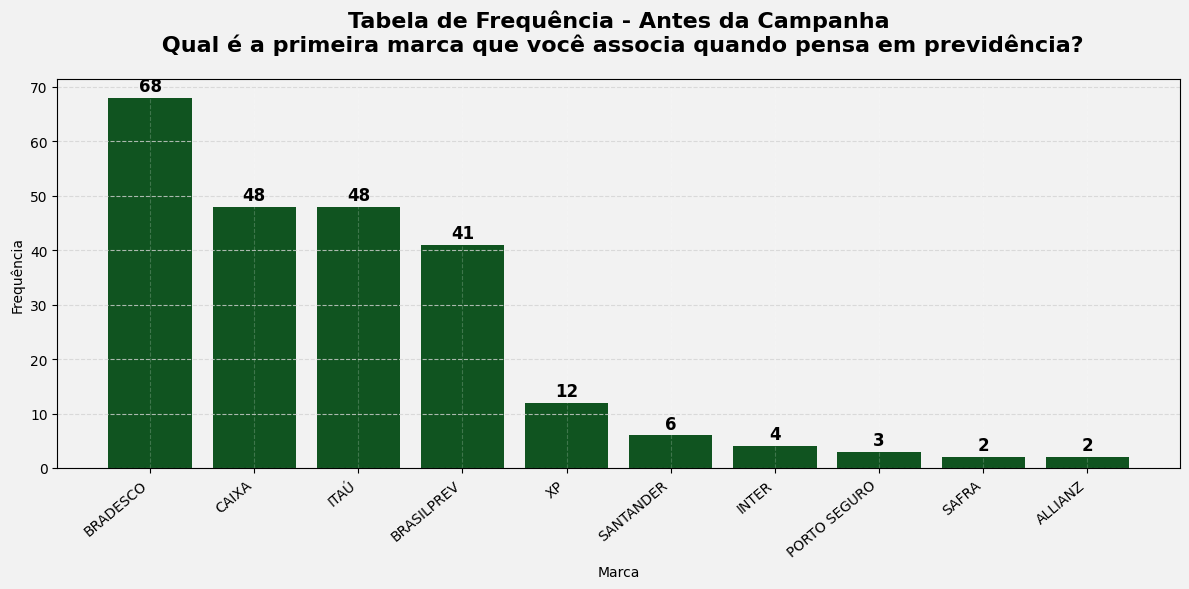

In [29]:
# Filtrar para remover a categoria "OUTROS"
respostas_df1_filtradas = df1_final[df1_final['BRAD31'] != 'OUTROS']['BRAD31']

# Contar a frequência das respostas filtradas
contagem_df1 = respostas_df1_filtradas.value_counts()

# Selecionar as 20 mais citadas (ou aumente se quiser mais)
top_10 = contagem_df1.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6), facecolor="#F2F2F2")  # fundo da figura
plt.gca().set_facecolor("#F2F2F2")
bars = plt.bar(top_10.index, top_10.values, color='#105420')

# Adicionar rótulos alinhados à direita
plt.xticks(range(len(top_10.index)), top_10.index, rotation=40, ha='right')

# Adicionar os valores de frequência acima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição x (centro da barra)
        height + 0.5,  # Posição y (acima da barra)
        f'{int(height)}',  # Texto (valor da frequência)
        ha='center',  # Alinhamento horizontal (centralizado)
        va='bottom',  # Alinhamento vertical (base no topo da barra)
        fontsize=12,
        fontweight='bold'
    )

# Adicionar título e rótulos dos eixos
plt.title("Tabela de Frequência - Antes da Campanha\n Qual é a primeira marca que você associa quando pensa em previdência?", fontsize=16, pad=20, fontweight='semibold')
plt.xlabel("Marca")
plt.ylabel("Frequência")

# Ajustar layout e grade
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.8, color="lightgray")
plt.grid(axis='x', linestyle='--', alpha=0.2, color="white")

# Exibir o gráfico
plt.show()

#### Tabela de Frequência de Após a Campanha

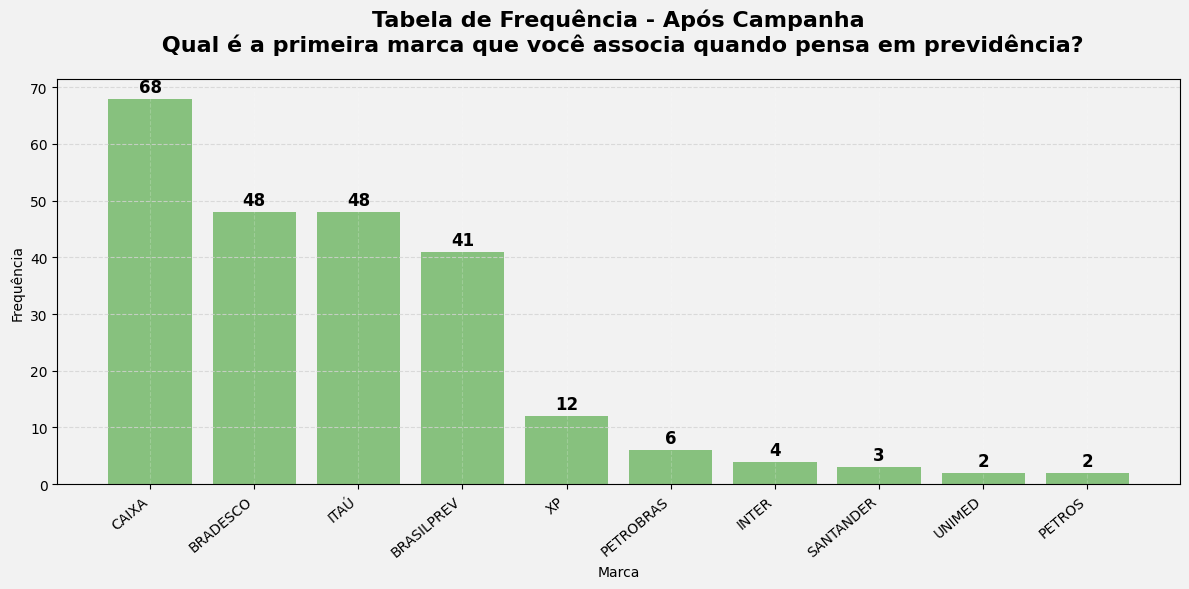

In [30]:
# Filtrar para remover a categoria "OUTROS"
respostas_df2_filtradas = df2_final[df2_final['BRAD31'] != 'OUTROS']['BRAD31']

# Contar a frequência das respostas filtradas
contagem_df2 = respostas_df2_filtradas.value_counts()

# Selecionar as 20 mais citadas (ou aumente se quiser mais)
top_10_2 = contagem_df2.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6), facecolor="#F2F2F2")  # fundo da figura
plt.gca().set_facecolor("#F2F2F2")
bars = plt.bar(top_10_2.index, top_10.values, color='#87C17E')

# Adicionar rótulos alinhados à direita
plt.xticks(range(len(top_10_2.index)), top_10_2.index, rotation=40, ha='right')

# Adicionar os valores de frequência acima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição x (centro da barra)
        height + 0.5,  # Posição y (acima da barra)
        f'{int(height)}',  # Texto (valor da frequência)
        ha='center',  # Alinhamento horizontal (centralizado)
        va='bottom',  # Alinhamento vertical (base no topo da barra)
        fontsize=12,
        fontweight='bold'
    )

# Adicionar título e rótulos dos eixos
plt.title("Tabela de Frequência - Após Campanha\n Qual é a primeira marca que você associa quando pensa em previdência?", fontsize=16, pad=20, fontweight='semibold')
plt.xlabel("Marca")
plt.ylabel("Frequência")

# Ajustar layout e grade
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.8, color="lightgray")
plt.grid(axis='x', linestyle='--', alpha=0.2, color="white")

# Exibir o gráfico
plt.show()

#### Tabela de Frequência de ambos questionários

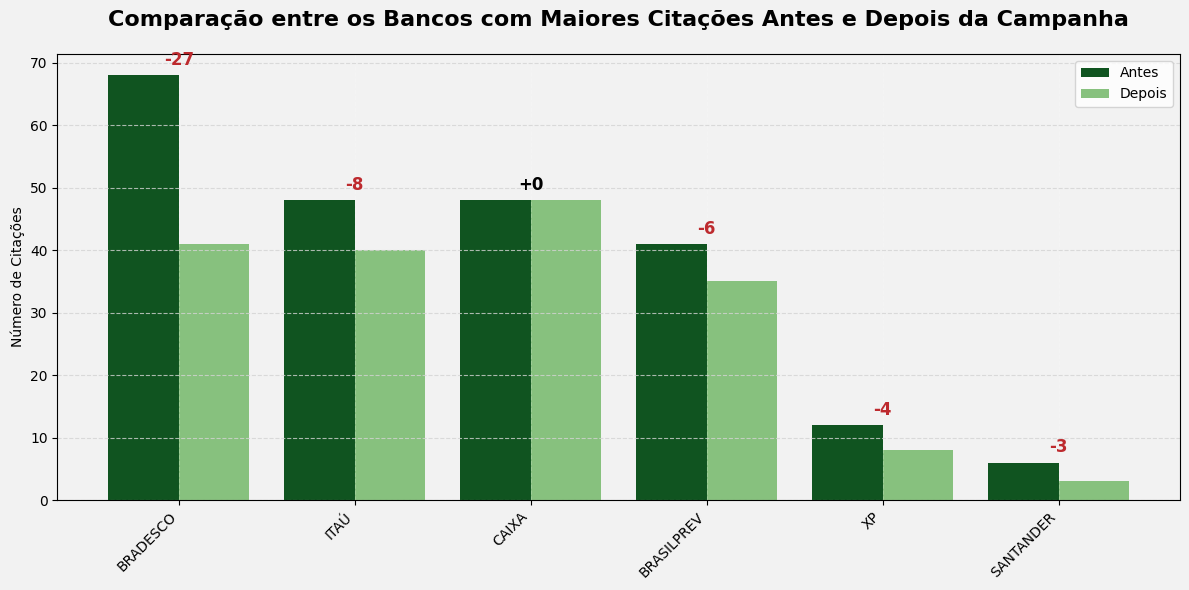

In [31]:
df_comparado = df_final[['BRAD31_antes', 'BRAD31_depois']].copy()

# Contar ocorrências
contagem_antes = Counter(df_comparado['BRAD31_antes'])
contagem_depois = Counter(df_comparado['BRAD31_depois'])

# Unir todos os nomes únicos
todos_bancos = set(contagem_antes) | set(contagem_depois)

# Organizar dados em DataFrame
dados = {
    'Banco': [],
    'Antes': [],
    'Depois': []
}

for banco in todos_bancos:
    antes = contagem_antes.get(banco, 0)
    depois = contagem_depois.get(banco, 0)

    # Filtrar bancos com mais de 4 citações no total e excluir a categoria "OUTROS"
    if (antes > 4 or depois > 4) and banco != "OUTROS":
        dados['Banco'].append(banco)
        dados['Antes'].append(antes)
        dados['Depois'].append(depois)

# Criar DataFrame filtrado
df_plot = pd.DataFrame(dados)
df_plot = df_plot.sort_values(by='Antes', ascending=False)

# -------------------------------
# Gráfico de barras lado a lado
# -------------------------------


x = range(len(df_plot))
bar_width = 0.4

# Criar o gráfico de barras
plt.figure(figsize=(12, 6), facecolor="#F2F2F2")  # fundo da figura
plt.gca().set_facecolor("#F2F2F2")
plt.bar([i - bar_width/2 for i in x],
        df_plot['Antes'],
        width=bar_width,
        label='Antes',
        color="#105420")   # cor para Antes

plt.bar([i + bar_width/2 for i in x],
        df_plot['Depois'],
        width=bar_width,
        label='Depois',
        color="#87C17E")   # cor para Depois

# Rótulos de diferença
for i, (antes, depois) in enumerate(zip(df_plot['Antes'], df_plot['Depois'])):
    diferenca = depois - antes
    cor = "black" if diferenca >= 0 else "#BD2A2E"
    plt.text(i, max(antes, depois) + 1,   # posição acima da barra maior
             f"{diferenca:+}",             # exibe com sinal (+/-)
             ha='center', va='bottom',
             fontsize=12, color=cor, fontweight='bold')

plt.xticks(x, df_plot['Banco'], rotation=45, ha='right')
plt.ylabel("Número de Citações")
plt.title("Comparação entre os Bancos com Maiores Citações Antes e Depois da Campanha",
          fontsize=16, pad=20, fontweight='bold')
plt.legend()

# Ajustar layout e grade
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.8, color="lightgray")
plt.grid(axis='x', linestyle='--', alpha=0.2, color="white")

plt.show()


### Teste de McNemar

O teste de McNemar é um teste estatístico para dados pareados binários, usado quando você quer comparar duas medidas de antes e depois sobre os mesmos indivíduos.

No teste a seguir, foi avaliado se houve influência significativa da campanha com relação a Previdência Privada BrasilPrev.

In [32]:
# Criar colunas booleanas: citou ou não "BRASILPREV"
df1_final['citou_antes'] = df1_final['BRAD31'] == 'BRASILPREV'
df2_final['citou_depois'] = df2_final['BRAD31'] == 'BRASILPREV'

# Tabela de contingência
contingencia = pd.crosstab(df1_final['citou_antes'], df2_final['citou_depois'])
print("\nTabela de contingência:")
print(contingencia)

# Aplicar teste de McNemar
resultado = mcnemar(contingencia, exact=False)
print(f"\nEstatística do teste: {resultado.statistic}")
print(f"Valor-p: {resultado.pvalue:.4f}")

# Interpretação
if resultado.pvalue < 0.05:
    print("Diferença significativa: a campanha pode ter influenciado as respostas.")
else:
    print("Sem evidência de diferença significativa nas respostas.")


Tabela de contingência:
citou_depois  False  True 
citou_antes               
False           802     32
True             38      3

Estatística do teste: 0.35714285714285715
Valor-p: 0.5501
Sem evidência de diferença significativa nas respostas.


A tabela de contingência mostra que 802 pessoas não citaram a BrasilPrev nem antes nem depois da campanha, enquanto 32 pessoas que não citavam a BrasilPrev antes passaram a mencioná-la após a campanha. Por outro lado, 38 pessoas que citavam a BrasilPrev antes deixaram de fazê-lo depois da campanha, e 3 pessoas continuaram citando a BrasilPrev tanto antes quanto depois.

O teste de McNemar, que avalia a significância estatística dessas mudanças, resultou em uma estatística de teste de 0,3571 e um valor-p de 0,5501. Como o valor-p é maior que 0,05, não há evidência estatística de que a campanha tenha causado uma mudança significativa nas respostas relacionadas à BrasilPrev. Isso significa que as variações observadas nas respostas antes e depois da campanha podem ser atribuídas ao acaso, e não a um efeito real da campanha.

Em resumo, a campanha não parece ter tido um impacto relevante na percepção ou menção da BrasilPrev. As mudanças foram relativamente pequenas e não são estatisticamente significativas. Portanto, não há evidência suficiente para concluir que a campanha influenciou de forma consistente as respostas dos participantes em relação à BrasilPrev.

## Análise de sexo por pesquisa

In [33]:
emails_em_comum = set(df1['user_email']) & set(df2['user_email'])

df1_filtrado = df1[df1['user_email'].isin(emails_em_comum)].copy()
df2_filtrado = df2[df2['user_email'].isin(emails_em_comum)].copy()

# Renomear as colunas de BRAD31
df1_filtrado = df1_filtrado.rename(columns={'BRAD31': 'BRAD31_antes'})
df2_filtrado = df2_filtrado.rename(columns={'BRAD31': 'BRAD31_depois'})

# Fazer merge pelas colunas em comum
df_comparado = pd.merge(df1_filtrado[['user_email', 'S2A', 'BRAD31_antes']],
                        df2_filtrado[['user_email', 'BRAD31_depois']],
                        on='user_email',
                        how='inner')

sexo_contagem = df_comparado['S2A'].value_counts(dropna=False)

print("Contagem de participantes por sexo (entre os que responderam as duas rodadas):")
print(sexo_contagem)

print("\nCom percentuais:")
print((sexo_contagem / sexo_contagem.sum() * 100).round(2))


Contagem de participantes por sexo (entre os que responderam as duas rodadas):
S2A
Masculino               545
Feminino                310
Prefiro não informar      9
Outro                     8
NaN                       3
Name: count, dtype: int64

Com percentuais:
S2A
Masculino               62.29
Feminino                35.43
Prefiro não informar     1.03
Outro                    0.91
NaN                      0.34
Name: count, dtype: float64


### Gráfico representativo do gênero dos participantes

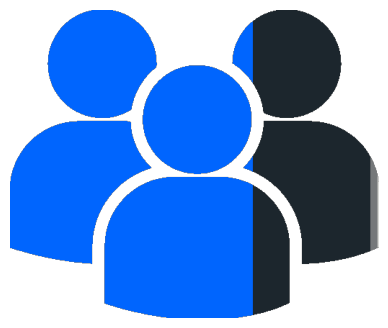

In [37]:
# @title S2A - Gráfico de Gênero
import cv2
import numpy as np

# Carregar a imagem com transparência
image_path = 'image.png'
img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

# Verificar se a imagem tem canal alfa (transparência)
if img.shape[2] == 4:
    alpha_channel = img[:, :, 3]  # Extrai o canal alfa
    mask = alpha_channel > 0  # Máscara onde a imagem é visível
    img_rgb = img[:, :, :3]  # Canais BGR (sem alfa)
else:
    mask = np.ones(img.shape[:2], dtype=bool)
    img_rgb = img

# Definir proporções e cores (em BGR - formato OpenCV)
proportions = [
    (0.66, (254, 101, 0)),    # Masculino: #0065FE (BGR)
    (0.32, (45, 38, 28)),      # Feminino: #1C262D (BGR)
    (0.02, (122, 120, 117)),  # Prefiro não informar: #75787A (BGR)
    (0.01, (214, 218, 217))   # Outros: #D9DAD6 (BGR)
]

# Criar imagem resultante (com transparência)
height, width = img.shape[:2]
result = np.zeros((height, width, 4), dtype=np.uint8)  # Imagem RGBA
x_start = 0

for proportion, color in proportions:
    x_end = x_start + int(width * proportion)

    # Aplicar cor apenas onde há conteúdo visível
    section_mask = mask[:, x_start:x_end]
    result[:, x_start:x_end, :3][section_mask] = color  # Cores BGR
    result[:, x_start:x_end, 3][section_mask] = 255     # Canal alfa (opaco)
    x_start = x_end

'''
# Se quiser salvar a imagem com transparência execute o código abaixo:
output_path = 'imagem_com_barras.png'
cv2.imwrite(output_path, result)

print(f"Imagem salva como '{output_path}' (com transparência)")'''

# Converter de BGR (OpenCV) para RGB
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGRA2RGBA)

plt.figure(figsize=(8, 4))
plt.imshow(result_rgb)
plt.axis("off")
plt.show()


A imagem acima foi elaborada de forma a representar a porcentagem dos gêneros: *Masculino*, *Feminino*, *Prefiro não informar* e *Outros*.

Com isso, em qualquer programa de edição de imagens, é possível ajustar a descrição da imagem e seus respectivos valores, transformando-a no resultado abaixo:

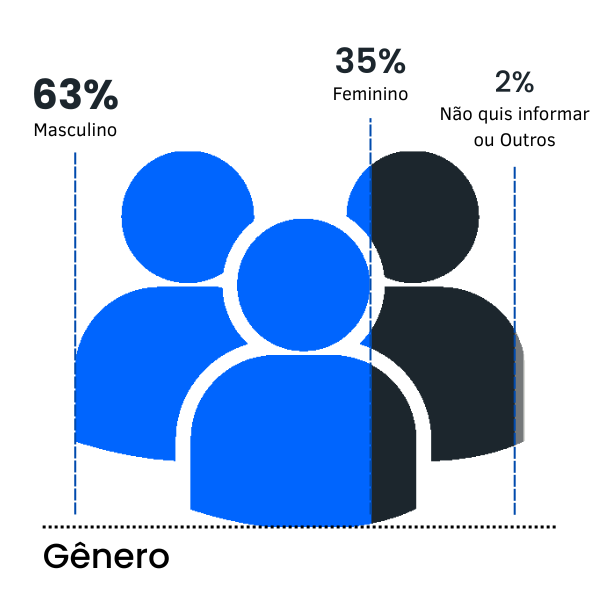